<a href="https://colab.research.google.com/github/marcosoares-92/IndustrialDataScienceWorkflow/blob/main/model_project/steel_industry_energy_consumption/etl_6_Process_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Process Diagnosis**

## _ETL Workflow Notebook 6_

## Content:
1. Obtaining Statistical Process Control (SPC) charts;
2. Evaluating the Process Capability (in relation to specifications).

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [ ]:
# Run installed library
import numpy as np
import pandas as pd
import idsw
from idsw import etl
from idsw.etl import etl_workflow as ewf

In [ ]:
# Run Python files
import numpy as np
import pandas as pd
import idsw
from etl import etl_workflow as ewf

## **Call the functions**

### **Mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [ ]:
SOURCE = 'google'
# SOURCE = 'google' for mounting the google drive;
# SOURCE = 'aws' for accessing an AWS S3 bucket

## THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN SOURCE == 'aws':

PATH_TO_STORE_IMPORTED_S3_BUCKET = ''
# PATH_TO_STORE_IMPORTED_S3_BUCKET: path of the Python environment to which the
# S3 bucket contents will be imported. If it is None; or if it is an empty string; or if 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = '/', bucket will be imported to the root path. 
# Alternatively, input the path as a string (in quotes). e.g. 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = 'copied_s3_bucket'

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for fetching AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
idsw.mount_storage_system (source = SOURCE, path_to_store_imported_s3_bucket = PATH_TO_STORE_IMPORTED_S3_BUCKET, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

Associate the Python environment to your Google Drive account, and authorize the access in the opened window.
Mounted at /content/drive
Now your Python environment is connected to your Google Drive: the root directory of your environment is now the root of your Google Drive.
In Google Colab, navigate to the folder icon ('Files') of the left navigation menu to find a specific folder or file in your Google Drive.
Click on the folder or file name and select the elipsis (...) icon on the right of the name to reveal the option 'Copy path', which will give you the path to use as input for loading objects and files on your Python environment.
Caution: save your files into different directories of the Google Drive. If files are all saved in a same folder or directory, like the root path, they may not be accessible from your Python environment.
If you still cannot see the file after moving it to a different folder, reload the environment.


### **Importing the dataset**

In [ ]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset_transformed_log.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 0.24 ms
Type conversion took: 0.64 ms
Parser memory cleanup took: 0.01 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/dataset_transformed_log.csv. Check the 10 first rows of this dataframe:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
0,2018-01-01 00:00:00,1,1,1,1,1.0,0.0,0.0,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391
1,2018-01-02 06:00:00,1,1,2,4,1.0,0.0,0.0,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748
2,2018-01-03 12:00:00,1,1,3,7,1.0,0.0,0.0,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374
3,2018-01-06 00:00:00,1,1,6,5,1.0,0.0,0.0,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708
4,2018-01-08 12:00:00,1,2,8,6,1.0,0.0,0.0,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724
5,2018-01-09 18:00:00,1,2,9,1,1.0,0.0,0.0,2.429959,1.076225,-4.849367,4.314358,4.449567,10.804258,2.961878
6,2018-01-11 00:00:00,1,2,11,4,0.0,0.0,1.0,2.623714,1.050064,-4.596871,4.364925,4.478360,10.498746,3.204750
7,2018-01-12 06:00:00,1,2,12,6,1.0,0.0,0.0,1.760283,1.887448,-5.061929,4.493330,4.342879,10.611277,2.883641
8,2018-01-13 12:00:00,1,2,13,7,1.0,0.0,0.0,1.827998,2.194053,-4.817951,4.491336,4.311677,10.712416,3.039893
9,2018-01-14 18:00:00,1,2,14,1,1.0,0.0,0.0,2.850364,1.711257,-4.233607,4.450546,4.421881,10.804258,3.527536


### **Obtaining Statistical Process Control (SPC) charts**

## Since the histogram showed a considerable skewness, let's estimate the central line as the median, not the mean.
- The median is a better alternative for skewed data such as the ones that follow geometric or lognormal distributions (median = mean × 0.693).

Variable timestamp successfully converted to datetime64[ns].

Using 3s (3 times the standard deviation) as estimator of the natural variation (control limits).

Attention! Point outside of natural variation (control limits).
Check the red_df dataframe returned for details on values outside the control limits.
They occur at the following time values:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log,upper_cl,lower_cl,center,control_limits_check
0,2018-02-25 00:00:00,2,8,25,7,1.0,0.0,0.0,1.231904,2.031279,-6.994767,4.437795,4.212453,10.498746,1.791926,4.898641,1.853255,3.375948,below_lower_control_limit
1,2018-03-30 18:00:00,3,13,30,6,1.0,0.0,0.0,0.563181,2.376726,-8.294050,4.421275,3.973461,10.804258,1.284907,4.898641,1.853255,3.375948,below_lower_control_limit
2,2018-05-19 18:00:00,5,20,19,7,0.0,1.0,0.0,0.987184,2.182214,-6.301619,4.386672,4.184301,10.804258,1.839809,4.898641,1.853255,3.375948,below_lower_control_limit
3,2018-06-16 06:00:00,6,24,16,6,1.0,0.0,0.0,1.018005,2.089309,-6.684612,4.376582,4.197607,10.611277,1.810036,4.898641,1.853255,3.375948,below_lower_control_limit


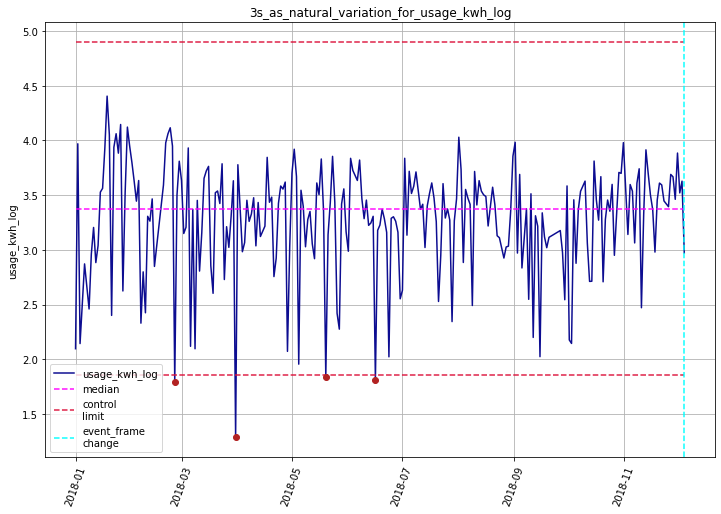

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

TIMESTAMP_TAG_COLUMN = "timestamp"
# TIMESTAMP_TAG_COLUMN: name (header) of the column containing the timestamps or the numeric scale
# used to represent time (column with floats or integers). The column name may be a string or a number.
# e.g. TIMESTAMP_TAG_COLUMN = 'date' will use the values from column 'date'
# Keep TIMESTAMP_TAG_COLUMN = None if the dataframe do not contain timestamps, so the index will be
# used.

COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'usage_kwh_log'
# COLUMN_WITH_VARIABLE_TO_BE_ANALYZED: name (header) of the column containing the variable
# which stability will be analyzed by the control chart. The column name may be a string or a number.
# Example: COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'analyzed_column' will analyze a column named
# "analyzed_column", whereas COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'col1' will evaluate column 'col1'.

COLUMN_WITH_LABELS_OR_SUBGROUPS = None
# COLUMN_WITH_LABELS_OR_SUBGROUPS: name (header) of the column containing the variable
# indicating the subgroups or label indication which will be used for grouping the samples. 
# Example: Suppose you want to analyze the means for 4 different subgroups: 1, 2, 3, 4. For each subgroup,
# 4 or 5 samples of data (the values in COLUMN_WITH_VARIABLE_TO_BE_ANALYZED) are collected, and you
# want the average and standard deviation within the subgroups. Them, you create a column named
# 'label' and store the values: 1 for samples correspondent to subgroup 1; 2 for samples from
# subgroup 2,... etc. In this case, COLUMN_WITH_LABELS_OR_SUBGROUPS = 'label'
# Notice that the samples do not need to be collected in order. The function will automatically separate
# the entries according to the subgroups. So, the entries in the dataset may be in an arbitrary order
# like: 1, 1, 2, 1, 4, 3, etc.
# The values in the COLUMN_WITH_LABELS_OR_SUBGROUPS may be strings (text) or numeric values (like
# integers), but different values will be interpreted as different subgroups.
# As an example of text, you could have a column named 'col1' with group identifications as: 
# 'A', 'B', 'C', 'D', and COLUMN_WITH_LABELS_OR_SUBGROUPS = 'col1'.
# Notice the difference between COLUMN_WITH_LABELS_OR_SUBGROUPS and COLUMN_WITH_VARIABLE_TO_BE_ANALYZED:
# COLUMN_WITH_VARIABLE_TO_BE_ANALYZED accepts only numeric values, so the binary variables must be
# converted to integers 0 and 1 before the analysis. The COLUMN_WITH_LABELS_OR_SUBGROUPS, in turns,
# accept both numeric and text (string) values.

COLUMN_WITH_EVENT_FRAME_INDICATION = None
# COLUMN_WITH_EVENT_FRAME_INDICATION: name (header) of the column containing the variable
# indicating the stages, time windows, or event frames. The central line and the limits of natural
# variation will be independently calculated for each event frame. The indication of an event frame
# may be textual (string) or numeric. 
# For example: suppose you have a column named 'event_frames'. For half of the entries, event_frame = 
# 'A'; and for the second half, event_frame = 'B'. If COLUMN_WITH_EVENT_FRAME_INDICATION = 'event_frame',
# the dataframe will be divided into two subsets: 'A', and 'B'. For each subset, the central lines
# and the limits of natural variation will be calculated independently. So, you can check if there is
# modification of the average value and of the dispersion when the time window is modified. It could
# reflect, for example, the use of different operational parameters on each event frame.
# Other possibilities of event indications: 0, 1, 2, 3, ... (sequence of integers); 'A', 'B', 'C', etc;
# 'stage1', 'stage2', ..., 'treatment1', 'treatment2',....; 'frame0', 'frame1', 'frame2', etc.
# ATTENTION: Do not identify different frames with the same value. For example, if
# COLUMN_WITH_EVENT_FRAME_INDICATION has missing values for the first values, then a sequence of rows
# is identified as number 0; followed by a sequence of missing values. In this case, the two windows
# with missing values would be merged as a single window, and the mean and variation would be
# obtained for this merged subset. Then, always specify different windows with different values.
# Other example: COLUMN_WITH_EVENT_FRAME_INDICATION = 'col1' will search for event frame indications
# in column 'col1'.

SPECIFICATION_LIMITS = {'lower_spec_lim': None, 
                        'upper_spec_lim': None}

# SPECIFICATION_LIMITS = {'lower_spec_lim': None, 'upper_spec_lim': None}
# If there are specification limits, input them in this dictionary. Do not modify the keys,
# simply substitute None by the lower and/or the upper specification.
# e.g. Suppose you have a tank that cannot have more than 10 L. So:
# SPECIFICATION_LIMITS = {'lower_spec_lim': None, 'upper_spec_lim': 10}, there is only
# an upper specification equals to 10 (do not add units);
# Suppose a temperature cannot be lower than 10 ºC, but there is no upper specification. So,
# SPECIFICATION_LIMITS = {'lower_spec_lim': 10, 'upper_spec_lim': None}. Finally, suppose
# a liquid which pH must be between 6.8 and 7.2:
# SPECIFICATION_LIMITS = {'lower_spec_lim': 6.8, 'upper_spec_lim': 7.2}

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a line passing through
# VARIABLE_TO_ANALYZE = 1.0

USE_SPC_CHART_ASSISTANT = False
# USE_SPC_CHART_ASSISTANT = False. Set USE_SPC_CHART_ASSISTANT = True to open the 
# visual flow chart assistant that will help you select the appropriate parameters; 
# as well as passing the data in the correct format. If the assistant is open, many of the 
# arguments of the function will be filled when using it.

CHART_TO_USE = '3s_as_natural_variation'
# The type of chart that will be obtained, as well as the methodology used for estimating the
# natural variation of the process. Notice that it may be strongly dependent on the statistical
# distribution. So, if you are not sure about the distribution, or simply want to apply a more
# general (less restrictive) methodology, set:

# CHART_TO_USE = '3s_as_natural_variation' to estimate the natural variation as 3 times the
# standard deviation (s); or
# CHART_TO_USE = 'std_error' for estimating it as 3 times the standard error, where 
# standard error = s/(n**0.5) = s/sqrt(n), n = number of samples (that may be the number of 
# individual data samples collected, or the number of subgroups or labels); sqrt is the square root.

# CHART_TO_USE = '3s_as_natural_variation' and CHART_TO_USE = 'std_error' are the only ones available
# for both individual and grouped data.

## ATTENTION: Do not group the variables before using the function. It will perform the automatic
# grouping in accordance to the values specified as COLUMN_WITH_LABELS_OR_SUBGROUPS.

# Other values allowed for CHART_TO_USE:

# CHART_TO_USE = 'i_mr', for individual values of a numeric (continuous) variable which follows the
# NORMAL distribution.

# CHART_TO_USE = 'xbar_s', for grouped values (by mean) of a numeric variable, where the mean values
# of labels or subgroups follow a NORMAL distribution.

# CHART_TO_USE = 'np', for grouped binary variables (allowed values: 0 or 1). This is the
# control chart for proportion of defectives. - Original data must follow the BINOMIAL distribution.

# CHART_TO_USE = 'p', for grouped binary variables (allowed values: 0 or 1). This is the
# control chart for count of defectives. - Original data must follow the BINOMIAL distribution.

# Attention: an error will be raised if CHART_TO_USE = 'np' or 'p' and the variable was not converted
# to a numeric binary, with values 0 or 1. This function do not perform the automatic ordinal or
# One-Hot encoding of the categorical features.

# CHART_TO_USE = 'u', for counts of occurrences per unit. - Original data must follow the POISSON
# distribution (special case of the gamma distribution).

# CHART_TO_USE = 'c', for average occurrence per unit. - Original data must follow the POISSON
# distribution (special case of the gamma distribution).

# CHARTS FOR ANALYZING RARE EVENTS
# CHART_TO_USE = 'g', for analyzing count of events between successive rare events occurrences 
# (data follow the GEOMETRIC distribution).
# CHART_TO_USE = 't', for analyzing time interval between successive rare events occurrences.

CONSIDER_SKEWED_DISTRIBUTION_WHEN_ESTIMATING_STD = True
# Whether the distribution of data to be analyzed present high skewness or kurtosis.
# If CONSIDER_SKEWED_DISTRIBUTION_WHEN_ESTIMATING_STD = False, the central lines will be estimated
# as the mean values of the analyzed variable. 
# If CONSIDER_SKEWED_DISTRIBUTION_WHEN_ESTIMATING_STD = True, the central lines will be estimated 
# as the median of the analyzed variable, which is a better alternative for skewed data such as the 
# ones that follow geometric or lognormal distributions (median = mean × 0.693).
# Notice that this argument has effect only when CHART_TO_USE = '3s_as_natural_variation' or 
# CHART_TO_USE = 'std_error'.

RARE_EVENT_INDICATION = None
# RARE_EVENT_INDICATION = None. String (in quotes), float or integer. If you want to analyze a
# rare event through 'g' or 't' control charts, this parameter is obbligatory. Also, notice that:
# COLUMN_WITH_VARIABLE_TO_BE_ANALYZED must be the column which contains an indication of the rare
# event occurrence, and the RARE_EVENT_INDICATION is the value of the column COLUMN_WITH_VARIABLE_TO_BE_ANALYZED
# when a rare event takes place.
# For instance, suppose RARE_EVENT_INDICATION = 'shutdown'. It means that column COLUMN_WITH_VARIABLE_TO_BE_ANALYZED
# has the value 'shutdown' when the rare event occurs, i.e., for timestamps when the system
# stopped. Other possibilities are RARE_EVENT_INDICATION = 0, or RARE_EVENT_INDICATION = -1,
# indicating that when COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 0 (or -1), we know that
# a rare event occurred. The most important thing here is that the value given to the rare event
# should be assigned ONLY to the rare events.

# You do not need to assign values for the other timestamps when no rare event took place. But it is
# important to keep all timestamps in the dataframe. That is because the rare events charts will
# compare the rare event occurrence against all other events and timestamps.
# If you are not analyzing rare events with 'g' or 't' charts, keep RARE_EVENT_INDICATION = None.

RARE_EVENT_TIMEDELTA_UNIT = 'day'
# RARE_EVENT_TIMEDELTA_UNIT: 'day', 'second', 'nanosecond', 'minute', 'hour',
# 'month', 'year' - This is the unit of time that will be used to plot the time interval
# (timedelta) between each successive rare events. If None or invalid value used, timedelta
# will be given in days.
# Notice that this parameter is referrent only to the rare events analysis with 'g' or 't' charts.
# Also, it is valid only when the timetag column effectively stores a timestamp. If the timestamp
# column stores a float or an integer (numeric) value, then the final dataframe and plot will be
# obtained in the same numeric scale of the original data, not in the unit indicated as
# RARE_EVENT_TIMEDELTA_UNIT.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'usage_kwh_log' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Processed dataframe and dataframe with values out of limits
# returned as dataset and red_df, respectively.
# Simply modify these objects on the left of equality:
dataset, red_df = ewf.statistical_process_control_chart (df = DATASET, column_with_variable_to_be_analyzed = COLUMN_WITH_VARIABLE_TO_BE_ANALYZED, timestamp_tag_column = TIMESTAMP_TAG_COLUMN, column_with_labels_or_subgroups = COLUMN_WITH_LABELS_OR_SUBGROUPS, column_with_event_frame_indication = COLUMN_WITH_EVENT_FRAME_INDICATION, specification_limits = SPECIFICATION_LIMITS, reference_value = REFERENCE_VALUE, use_spc_chart_assistant = USE_SPC_CHART_ASSISTANT, chart_to_use = CHART_TO_USE, consider_skewed_dist_when_estimating_with_std = CONSIDER_SKEWED_DISTRIBUTION_WHEN_ESTIMATING_STD, rare_event_indication = RARE_EVENT_INDICATION, rare_event_timedelta_unit = RARE_EVENT_TIMEDELTA_UNIT, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable timestamp successfully converted to datetime64[ns].

If you are not confident about the statistical distribution, select chart_to_use = '3s_as_natural_variation' to use 3 times the standard deviation as estimator for the natural variation (the control limits); or chart_to_use = 'std_error' to use 3 times the standard error as control limits.



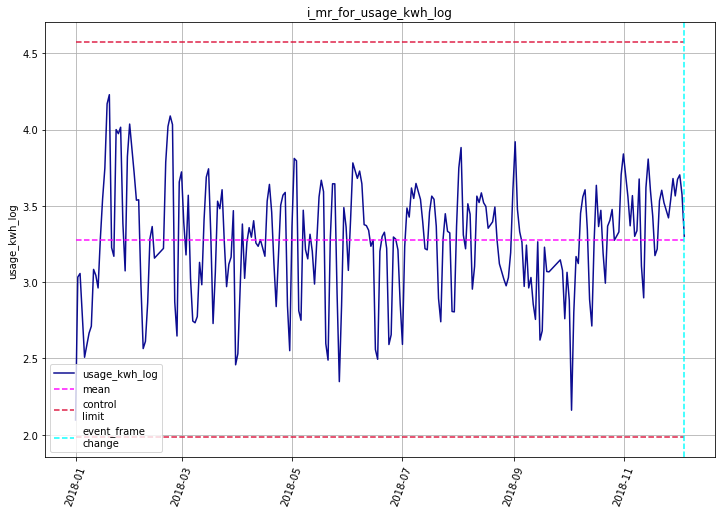

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

TIMESTAMP_TAG_COLUMN = "timestamp"
# TIMESTAMP_TAG_COLUMN: name (header) of the column containing the timestamps or the numeric scale
# used to represent time (column with floats or integers). The column name may be a string or a number.
# e.g. TIMESTAMP_TAG_COLUMN = 'date' will use the values from column 'date'
# Keep TIMESTAMP_TAG_COLUMN = None if the dataframe do not contain timestamps, so the index will be
# used.

COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'usage_kwh_log'
# COLUMN_WITH_VARIABLE_TO_BE_ANALYZED: name (header) of the column containing the variable
# which stability will be analyzed by the control chart. The column name may be a string or a number.
# Example: COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'analyzed_column' will analyze a column named
# "analyzed_column", whereas COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'col1' will evaluate column 'col1'.

COLUMN_WITH_LABELS_OR_SUBGROUPS = None
# COLUMN_WITH_LABELS_OR_SUBGROUPS: name (header) of the column containing the variable
# indicating the subgroups or label indication which will be used for grouping the samples. 
# Example: Suppose you want to analyze the means for 4 different subgroups: 1, 2, 3, 4. For each subgroup,
# 4 or 5 samples of data (the values in COLUMN_WITH_VARIABLE_TO_BE_ANALYZED) are collected, and you
# want the average and standard deviation within the subgroups. Them, you create a column named
# 'label' and store the values: 1 for samples correspondent to subgroup 1; 2 for samples from
# subgroup 2,... etc. In this case, COLUMN_WITH_LABELS_OR_SUBGROUPS = 'label'
# Notice that the samples do not need to be collected in order. The function will automatically separate
# the entries according to the subgroups. So, the entries in the dataset may be in an arbitrary order
# like: 1, 1, 2, 1, 4, 3, etc.
# The values in the COLUMN_WITH_LABELS_OR_SUBGROUPS may be strings (text) or numeric values (like
# integers), but different values will be interpreted as different subgroups.
# As an example of text, you could have a column named 'col1' with group identifications as: 
# 'A', 'B', 'C', 'D', and COLUMN_WITH_LABELS_OR_SUBGROUPS = 'col1'.
# Notice the difference between COLUMN_WITH_LABELS_OR_SUBGROUPS and COLUMN_WITH_VARIABLE_TO_BE_ANALYZED:
# COLUMN_WITH_VARIABLE_TO_BE_ANALYZED accepts only numeric values, so the binary variables must be
# converted to integers 0 and 1 before the analysis. The COLUMN_WITH_LABELS_OR_SUBGROUPS, in turns,
# accept both numeric and text (string) values.

COLUMN_WITH_EVENT_FRAME_INDICATION = None
# COLUMN_WITH_EVENT_FRAME_INDICATION: name (header) of the column containing the variable
# indicating the stages, time windows, or event frames. The central line and the limits of natural
# variation will be independently calculated for each event frame. The indication of an event frame
# may be textual (string) or numeric. 
# For example: suppose you have a column named 'event_frames'. For half of the entries, event_frame = 
# 'A'; and for the second half, event_frame = 'B'. If COLUMN_WITH_EVENT_FRAME_INDICATION = 'event_frame',
# the dataframe will be divided into two subsets: 'A', and 'B'. For each subset, the central lines
# and the limits of natural variation will be calculated independently. So, you can check if there is
# modification of the average value and of the dispersion when the time window is modified. It could
# reflect, for example, the use of different operational parameters on each event frame.
# Other possibilities of event indications: 0, 1, 2, 3, ... (sequence of integers); 'A', 'B', 'C', etc;
# 'stage1', 'stage2', ..., 'treatment1', 'treatment2',....; 'frame0', 'frame1', 'frame2', etc.
# ATTENTION: Do not identify different frames with the same value. For example, if
# COLUMN_WITH_EVENT_FRAME_INDICATION has missing values for the first values, then a sequence of rows
# is identified as number 0; followed by a sequence of missing values. In this case, the two windows
# with missing values would be merged as a single window, and the mean and variation would be
# obtained for this merged subset. Then, always specify different windows with different values.
# Other example: COLUMN_WITH_EVENT_FRAME_INDICATION = 'col1' will search for event frame indications
# in column 'col1'.

SPECIFICATION_LIMITS = {'lower_spec_lim': None, 
                        'upper_spec_lim': None}

# SPECIFICATION_LIMITS = {'lower_spec_lim': None, 'upper_spec_lim': None}
# If there are specification limits, input them in this dictionary. Do not modify the keys,
# simply substitute None by the lower and/or the upper specification.
# e.g. Suppose you have a tank that cannot have more than 10 L. So:
# SPECIFICATION_LIMITS = {'lower_spec_lim': None, 'upper_spec_lim': 10}, there is only
# an upper specification equals to 10 (do not add units);
# Suppose a temperature cannot be lower than 10 ºC, but there is no upper specification. So,
# SPECIFICATION_LIMITS = {'lower_spec_lim': 10, 'upper_spec_lim': None}. Finally, suppose
# a liquid which pH must be between 6.8 and 7.2:
# SPECIFICATION_LIMITS = {'lower_spec_lim': 6.8, 'upper_spec_lim': 7.2}

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a line passing through
# VARIABLE_TO_ANALYZE = 1.0

USE_SPC_CHART_ASSISTANT = False
# USE_SPC_CHART_ASSISTANT = False. Set USE_SPC_CHART_ASSISTANT = True to open the 
# visual flow chart assistant that will help you select the appropriate parameters; 
# as well as passing the data in the correct format. If the assistant is open, many of the 
# arguments of the function will be filled when using it.

CHART_TO_USE = 'i_mr'
# The type of chart that will be obtained, as well as the methodology used for estimating the
# natural variation of the process. Notice that it may be strongly dependent on the statistical
# distribution. So, if you are not sure about the distribution, or simply want to apply a more
# general (less restrictive) methodology, set:

# CHART_TO_USE = '3s_as_natural_variation' to estimate the natural variation as 3 times the
# standard deviation (s); or
# CHART_TO_USE = 'std_error' for estimating it as 3 times the standard error, where 
# standard error = s/(n**0.5) = s/sqrt(n), n = number of samples (that may be the number of 
# individual data samples collected, or the number of subgroups or labels); sqrt is the square root.

# CHART_TO_USE = '3s_as_natural_variation' and CHART_TO_USE = 'std_error' are the only ones available
# for both individual and grouped data.

## ATTENTION: Do not group the variables before using the function. It will perform the automatic
# grouping in accordance to the values specified as COLUMN_WITH_LABELS_OR_SUBGROUPS.

# Other values allowed for CHART_TO_USE:

# CHART_TO_USE = 'i_mr', for individual values of a numeric (continuous) variable which follows the
# NORMAL distribution.

# CHART_TO_USE = 'xbar_s', for grouped values (by mean) of a numeric variable, where the mean values
# of labels or subgroups follow a NORMAL distribution.

# CHART_TO_USE = 'np', for grouped binary variables (allowed values: 0 or 1). This is the
# control chart for proportion of defectives. - Original data must follow the BINOMIAL distribution.

# CHART_TO_USE = 'p', for grouped binary variables (allowed values: 0 or 1). This is the
# control chart for count of defectives. - Original data must follow the BINOMIAL distribution.

# Attention: an error will be raised if CHART_TO_USE = 'np' or 'p' and the variable was not converted
# to a numeric binary, with values 0 or 1. This function do not perform the automatic ordinal or
# One-Hot encoding of the categorical features.

# CHART_TO_USE = 'u', for counts of occurrences per unit. - Original data must follow the POISSON
# distribution (special case of the gamma distribution).

# CHART_TO_USE = 'c', for average occurrence per unit. - Original data must follow the POISSON
# distribution (special case of the gamma distribution).

# CHARTS FOR ANALYZING RARE EVENTS
# CHART_TO_USE = 'g', for analyzing count of events between successive rare events occurrences 
# (data follow the GEOMETRIC distribution).
# CHART_TO_USE = 't', for analyzing time interval between successive rare events occurrences.

CONSIDER_SKEWED_DISTRIBUTION_WHEN_ESTIMATING_STD = True
# Whether the distribution of data to be analyzed present high skewness or kurtosis.
# If CONSIDER_SKEWED_DISTRIBUTION_WHEN_ESTIMATING_STD = False, the central lines will be estimated
# as the mean values of the analyzed variable. 
# If CONSIDER_SKEWED_DISTRIBUTION_WHEN_ESTIMATING_STD = True, the central lines will be estimated 
# as the median of the analyzed variable, which is a better alternative for skewed data such as the 
# ones that follow geometric or lognormal distributions (median = mean × 0.693).
# Notice that this argument has effect only when CHART_TO_USE = '3s_as_natural_variation' or 
# CHART_TO_USE = 'std_error'.

RARE_EVENT_INDICATION = None
# RARE_EVENT_INDICATION = None. String (in quotes), float or integer. If you want to analyze a
# rare event through 'g' or 't' control charts, this parameter is obbligatory. Also, notice that:
# COLUMN_WITH_VARIABLE_TO_BE_ANALYZED must be the column which contains an indication of the rare
# event occurrence, and the RARE_EVENT_INDICATION is the value of the column COLUMN_WITH_VARIABLE_TO_BE_ANALYZED
# when a rare event takes place.
# For instance, suppose RARE_EVENT_INDICATION = 'shutdown'. It means that column COLUMN_WITH_VARIABLE_TO_BE_ANALYZED
# has the value 'shutdown' when the rare event occurs, i.e., for timestamps when the system
# stopped. Other possibilities are RARE_EVENT_INDICATION = 0, or RARE_EVENT_INDICATION = -1,
# indicating that when COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 0 (or -1), we know that
# a rare event occurred. The most important thing here is that the value given to the rare event
# should be assigned ONLY to the rare events.

# You do not need to assign values for the other timestamps when no rare event took place. But it is
# important to keep all timestamps in the dataframe. That is because the rare events charts will
# compare the rare event occurrence against all other events and timestamps.
# If you are not analyzing rare events with 'g' or 't' charts, keep RARE_EVENT_INDICATION = None.

RARE_EVENT_TIMEDELTA_UNIT = 'day'
# RARE_EVENT_TIMEDELTA_UNIT: 'day', 'second', 'nanosecond', 'minute', 'hour',
# 'month', 'year' - This is the unit of time that will be used to plot the time interval
# (timedelta) between each successive rare events. If None or invalid value used, timedelta
# will be given in days.
# Notice that this parameter is referrent only to the rare events analysis with 'g' or 't' charts.
# Also, it is valid only when the timetag column effectively stores a timestamp. If the timestamp
# column stores a float or an integer (numeric) value, then the final dataframe and plot will be
# obtained in the same numeric scale of the original data, not in the unit indicated as
# RARE_EVENT_TIMEDELTA_UNIT.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'usage_kwh_log' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Processed dataframe and dataframe with values out of limits
# returned as dataset and red_df, respectively.
# Simply modify these objects on the left of equality:
dataset, red_df = ewf.statistical_process_control_chart (df = DATASET, column_with_variable_to_be_analyzed = COLUMN_WITH_VARIABLE_TO_BE_ANALYZED, timestamp_tag_column = TIMESTAMP_TAG_COLUMN, column_with_labels_or_subgroups = COLUMN_WITH_LABELS_OR_SUBGROUPS, column_with_event_frame_indication = COLUMN_WITH_EVENT_FRAME_INDICATION, specification_limits = SPECIFICATION_LIMITS, reference_value = REFERENCE_VALUE, use_spc_chart_assistant = USE_SPC_CHART_ASSISTANT, chart_to_use = CHART_TO_USE, consider_skewed_dist_when_estimating_with_std = CONSIDER_SKEWED_DISTRIBUTION_WHEN_ESTIMATING_STD, rare_event_indication = RARE_EVENT_INDICATION, rare_event_timedelta_unit = RARE_EVENT_TIMEDELTA_UNIT, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

- In many low-maturity processes, specially where there are no rigid legal constraints, there are no specification limits.
- An important outcome of an improvement project would be, in those cases, the definition of the quality boundaries.

# Now, suppose the stakeholders set an upper boundary for the energy consume: it should not exceed 45 kWh.
- Firstly, let's convert this limit to the log-scale.
- Notice that all logarithms are natural (base e).

In [ ]:
# Calculate the log for 45 kWh:
consume_upper_limit = np.log(45)
print("Upper specification in log-scale: {}".format(consume_upper_limit))

Upper specification in log-scale: 3.8066624897703196


### **Evaluating the Process Capability (in relation to specifications)**



Interpretation:
p-value: probability that data is described by the normal distribution.
Criterion: the series is not described by normal if p < alpha = 0.100.


D'Agostino and Pearson's normality test (scipy.stats normality test):
p-value = 8.819929e-02 = 8.82% of probability of being normal.
p = 0.088 < 0.100
According to this test, data is not described by the normal distribution, for the 10.0% confidence level defined.


Shapiro-Wilk normality test:
p-value = 4.952039e-02 = 4.95% of probability of being normal.
p = 0.050 < 0.100
According to this test, data is not described by the normal distribution, for the 10.0% confidence level defined.


Lilliefors's normality test:
p-value = 8.178635e-02 = 8.18% of probability of being normal.
p = 0.082 < 0.100
According to this test, data is not described by the normal distribution, for the 10.0% confidence level defined.


Anderson-Darling (AD) normality test:
p-value = 1.059352e-02 = 1.06% of probability of being normal.
p = 0.011 < 0.100

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>




Check the capability summary dataframe:



,value
indicator,
cp,1.233216
cr,81.088781
cm,0.924912
zu,1.405244
zl,5.994054
z_min,1.405244
cpk,0.468415
cpm,0.492723


Capable process: a process which attends its specifications.
Naturally, we want processes capable of attending the specifications.

Specification range:
Absolute value of the difference between the upper and the lower limits of specification.

6s interval:
Consider mean value = mu; standard deviation = s
For a normal distribution, 99.7% of the values range from its (mu - 3s) to (mu + 3s).
So, if the process follows the normal distribution, we can consider that virtually all of the data is in this range with 6s width.

Cp:
Relation between specification range and 6s.

Cr:
Usually, 6s > specification range.
So, the inverse of Cp is the fraction of 6s correspondent to the specification range.
Example: if 1/Cp = 0.2, then the specification range corresponds to 0.20 (20%) of the 6s interval.
Cr = 100 x (1/Cp) - the percent of 6s correspondent to the specification range.
Again, if 1/Cp = 0.2, then Cr = 20: the specification range corresponds to 20% of the 6s interval.

Cm:
It is a more gener

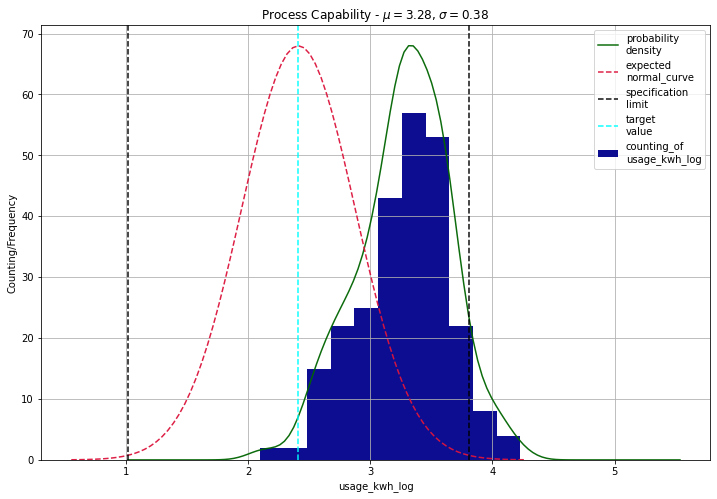

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'usage_kwh_log'
# COLUMN_WITH_VARIABLE_TO_BE_ANALYZED: name (header) of the column containing the variable
# which stability will be analyzed by the control chart. The column name may be a string or a number.
# Example: COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'analyzed_column' will analyze a column named
# "analyzed_column", whereas COLUMN_WITH_VARIABLE_TO_BE_ANALYZED = 'col1' will evaluate column 'col1'.

SPECIFICATION_LIMITS = {'lower_spec_lim': None, 
                        'upper_spec_lim': consume_upper_limit}

# SPECIFICATION_LIMITS = {'lower_spec_lim': None, 'upper_spec_lim': None}
# If there are specification limits, input them in this dictionary. Do not modify the keys,
# simply substitute None by the lower and/or the upper specification.
# e.g. Suppose you have a tank that cannot have more than 10 L. So:
# SPECIFICATION_LIMITS = {'lower_spec_lim': None, 'upper_spec_lim': 10}, there is only
# an upper specification equals to 10 (do not add units);
# Suppose a temperature cannot be lower than 10 ºC, but there is no upper specification. So,
# SPECIFICATION_LIMITS = {'lower_spec_lim': 10, 'upper_spec_lim': None}. Finally, suppose
# a liquid which pH must be between 6.8 and 7.2:
# SPECIFICATION_LIMITS = {'lower_spec_lim': 6.8, 'upper_spec_lim': 7.2}

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a line passing through
# VARIABLE_TO_ANALYZE = 1.0


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Summary dictionary returned as stats_dict.
# Simply modify this object on the left of equality:
stats_dict = ewf.process_capability (df = DATASET, column_with_variable_to_be_analyzed = COLUMN_WITH_VARIABLE_TO_BE_ANALYZED, specification_limits = SPECIFICATION_LIMITS, reference_value = REFERENCE_VALUE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# Attention: notice that all the tests indicated that the considerable skewness of the data make the distribution not-normal, so one should be very careful when analyzing the indicators.
- We see that a considerable amount of data occurs after the boundary.
- We can check this amount in the quantiles table.
- Also, notice that the process is poorly-centered.

# **As a final data-preparation step**, let's remove the features that are correlated to each other.
- Such variables contain the same amount of information. If we keep them, we would virtually increase the importance of these information on the model.
- As we observed:
  - week and month are perfectly correlated. Let's remove week for modelling.
  - lagging_current_reactive_power_kvarh_log and co2_tco2_log are also perfectly correlated.
    - Since the more fundamental physical variable is lagging_current_reactive_power_kvarh_log, we can keep only this one when modelling.
    - Also, both are very good predictors for the energy consume, so we will not lose this prediction power. Since there are two strong linear correlations, the amount of CO2 can be easily obtained from the others.

In [ ]:
dataset.columns

Index(['timestamp', 'month', 'week', 'day', 'day_of_week',
       'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc',
       'lagging_current_reactive_power_kvarh_log',
       'leading_current_reactive_power_kvarh_log', 'co2_tco2_log',
       'lagging_current_power_factor_log', 'leading_current_power_factor_log',
       'nsm_log', 'usage_kwh_log', 'upper_cl', 'lower_cl', 'center',
       'control_limits_check', 'moving_range'],
      dtype='object')

In [ ]:
dataset.drop(['week', 'co2_tco2_log'], axis = 1, inplace = True)

In [ ]:
dataset

,timestamp,month,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log,upper_cl,lower_cl,center,control_limits_check,moving_range
0,2018-01-01 00:00:00,1,1,1,1.0,0.0,0.0,1.505262,2.067875,4.426909,4.184504,10.498746,2.096391,4.57245,1.981813,3.277131,in_control_limits,0.000000
1,2018-01-02 06:00:00,1,2,4,1.0,0.0,0.0,3.164469,0.034965,4.411671,4.587960,10.611277,3.033069,4.57245,1.981813,3.277131,in_control_limits,1.873357
2,2018-01-03 12:00:00,1,3,7,1.0,0.0,0.0,0.704788,2.294133,4.458656,4.136259,10.712416,3.056561,4.57245,1.981813,3.277131,in_control_limits,1.826373
3,2018-01-06 00:00:00,1,6,5,1.0,0.0,0.0,2.308062,1.325394,4.283139,4.466448,10.498746,2.507541,4.57245,1.981813,3.277131,in_control_limits,0.728334
4,2018-01-08 12:00:00,1,8,6,1.0,0.0,0.0,1.440210,1.792162,4.406107,4.269865,10.712416,2.665716,4.57245,1.981813,3.277131,in_control_limits,0.411984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2018-11-29 12:00:00,11,29,5,1.0,0.0,0.0,2.592321,0.855620,4.447324,4.531214,10.712416,3.564873,4.57245,1.981813,3.277131,in_control_limits,0.205804
249,2018-11-30 18:00:00,11,30,5,1.0,0.0,0.0,3.031502,1.067437,4.451893,4.524674,10.804258,3.673463,4.57245,1.981813,3.277131,in_control_limits,0.422984
250,2018-12-02 00:00:00,12,2,1,1.0,0.0,0.0,2.598905,0.646056,4.405411,4.581671,10.498746,3.702737,4.57245,1.981813,3.277131,in_control_limits,0.364435
251,2018-12-03 06:00:00,12,3,1,1.0,0.0,0.0,2.698056,0.139182,4.386886,4.575722,10.611277,3.574357,4.57245,1.981813,3.277131,in_control_limits,0.107674


# Before exporting, remove the information regarding control limits:

In [ ]:
dataset.drop(['upper_cl', 'lower_cl', 'center', 'control_limits_check', 'moving_range'], axis = 1, inplace = True)
dataset

,timestamp,month,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
0,2018-01-01 00:00:00,1,1,1,1.0,0.0,0.0,1.505262,2.067875,4.426909,4.184504,10.498746,2.096391
1,2018-01-02 06:00:00,1,2,4,1.0,0.0,0.0,3.164469,0.034965,4.411671,4.587960,10.611277,3.033069
2,2018-01-03 12:00:00,1,3,7,1.0,0.0,0.0,0.704788,2.294133,4.458656,4.136259,10.712416,3.056561
3,2018-01-06 00:00:00,1,6,5,1.0,0.0,0.0,2.308062,1.325394,4.283139,4.466448,10.498746,2.507541
4,2018-01-08 12:00:00,1,8,6,1.0,0.0,0.0,1.440210,1.792162,4.406107,4.269865,10.712416,2.665716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2018-11-29 12:00:00,11,29,5,1.0,0.0,0.0,2.592321,0.855620,4.447324,4.531214,10.712416,3.564873
249,2018-11-30 18:00:00,11,30,5,1.0,0.0,0.0,3.031502,1.067437,4.451893,4.524674,10.804258,3.673463
250,2018-12-02 00:00:00,12,2,1,1.0,0.0,0.0,2.598905,0.646056,4.405411,4.581671,10.498746,3.702737
251,2018-12-03 06:00:00,12,3,1,1.0,0.0,0.0,2.698056,0.139182,4.386886,4.575722,10.611277,3.574357


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [ ]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset_log_transf_reduced"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

idsw.export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset_log_transf_reduced exported as CSV file to notebook's workspace as 'dataset_log_transf_reduced.csv'.


## **Downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

#### Case 2: download a file from Colab's workspace

In [ ]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "dataset_log_transf_reduced.csv"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File dataset_log_transf_reduced.csv successfully downloaded from Colab environment.


****